Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this project is to build a model that borrowers can use to help make the best financial decisions.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [208]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
# import dataset
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/GiveMeSomeCredit/cs-test.csv')
target_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/GiveMeSomeCredit/sampleEntry.csv')

In [210]:
# Display Dataset
train_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [211]:
target_data

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [212]:
# Merge Train and Target dataset together with full_outer join because they are two foreign dataset

ds = pd.concat([train_data, target_data], axis = 1)
ds

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Id,Probability
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,1,0.080807
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,2,0.040719
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,3,0.011968
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,4,0.067640
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,5,0.108264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,101499,0.045363
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,101500,0.343775
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN,101501,0.006970
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0,101502,0.121994


In [213]:
# Treat missing dataset
ds.isnull().sum().sort_values(ascending = False).head(3)

SeriousDlqin2yrs      101503
MonthlyIncome          20103
NumberOfDependents      2626
dtype: int64

In [214]:
# Drop rows with null values

ds.drop(['SeriousDlqin2yrs', 'Id'], axis = 1,  inplace = True)
ds.dropna(inplace = True) # Drop all the rows with null values
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81400 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            81400 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  81400 non-null  float64
 2   age                                   81400 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  81400 non-null  int64  
 4   DebtRatio                             81400 non-null  float64
 5   MonthlyIncome                         81400 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       81400 non-null  int64  
 7   NumberOfTimes90DaysLate               81400 non-null  int64  
 8   NumberRealEstateLoansOrLines          81400 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  81400 non-null  int64  
 10  NumberOfDependents                    81400 non-null  float64
 11  Probability   

In [215]:
ds.shape

(81400, 12)

---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> Preprocessing and Feature Selection:</h2>

In [216]:
dx = ds.copy()

In [217]:
# Split into target and features
target = dx.pop('Probability')
features = dx

In [218]:
# Check the kind of target

from sklearn.utils.multiclass import type_of_target
type_of_target(target)

'continuous'

Optimal number of features : 9


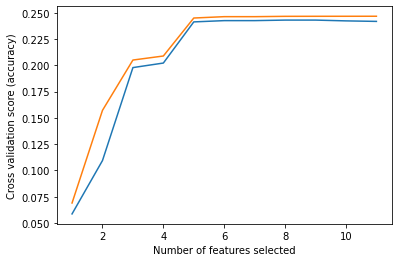

In [219]:
# Using RECURSIVE FEATURE ELIMINATION to tell how many features will be optimal.
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import warnings
warnings.filterwarnings("ignore")
min_features_to_select = 1

rfe = LinearRegression() # Instantiate the algo
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rfecv  = RFECV(estimator= rfe, step=1, cv= 2, scoring="r2") # We use the r2_score because it's defined for continous output
fit = rfecv.fit(features, target)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,)
plt.show()


In [220]:
 # Now that the optimal number of columns has been known, we can use Recursive Feature Elimination to identify identify the Optimal columns
 # Create the RFE object and rank the columns
from sklearn.feature_selection import RFE

rfc = LinearRegression()
rfe = RFE(estimator=rfc, n_features_to_select= 9, step=1) 
fittings1 = rfe.fit(features, target)
for i in range(features.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000


In [221]:
# Display the columns to remove based on recursive feature elimination

columns_to_remove = features.columns.values[np.logical_not(rfe.support_)]
columns_to_remove

array(['Unnamed: 0', 'MonthlyIncome'], dtype=object)

In [222]:
new_df = features.drop(['Unnamed: 0'], axis = 1)
new_df.shape


(81400, 10)

### Train and Test Split

In [223]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, target, train_size = 0.80, random_state = 39)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print('y-train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (65120, 10)
X_test: (16280, 10)
y-train: (65120,)
y_test: (16280,)


-------------------------------------------------------------------------
###Feature Scaling

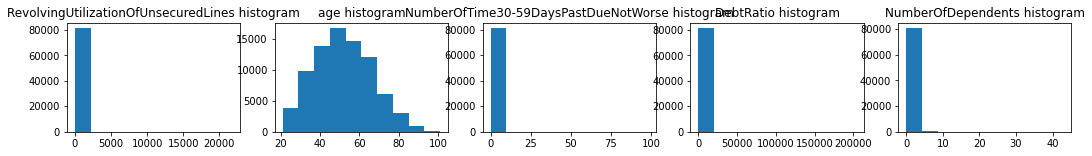

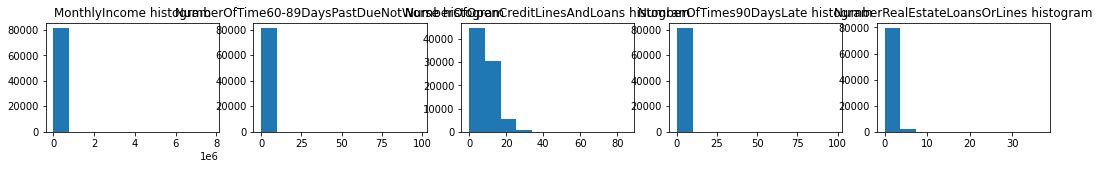

In [224]:
# We Normalize when the data distribution is not normal
# Test for Normality 
def Normality_Test (a,b,c,d,e):
  plt.figure(figsize=(18,2))
  plt.subplot(1,5,1)
  plt.hist(new_df[a])
  plt.title(a + ' histogram')

  plt.subplot(1,5,2)
  plt.hist(new_df[b])
  plt.title(b + ' histogram')

  plt.subplot(1,5,3)
  plt.hist(new_df[c])
  plt.title(c + ' histogram')

  plt.subplot(1,5,4)
  plt.hist(new_df[d])
  plt.title(d + ' histogram')

  plt.subplot(1,5,5)
  plt.hist(new_df[e])
  plt.title(e + ' histogram')

Normality_Test('RevolvingUtilizationOfUnsecuredLines', 'age', 
               'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio','NumberOfDependents')
Normality_Test('MonthlyIncome', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines')

The Dataset are not a normal distribution, hence we normalize

In [225]:
new_df.max()

RevolvingUtilizationOfUnsecuredLines      21821.0
age                                         101.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                202990.0
MonthlyIncome                           7727000.0
NumberOfOpenCreditLinesAndLoans              85.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 37.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           43.0
dtype: float64

None of the column is binary, hence we normalize them to make the values fall within the range of 0 and 1

#### Scaling

In [226]:
selColumns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [227]:
from sklearn.preprocessing import MinMaxScaler

xtrain = X_train.copy()
xtest = X_test.copy()
for i in selColumns:
    scaler = MinMaxScaler().fit(X_train[[i]])
    xtrain[i] = scaler.transform(X_train[[i]])
    xtest[i] = scaler.transform(X_test[[i]])

------------------------------------------------------------------------------
# Modelling
- XGBoost
- TensorFlow

In [228]:
from sklearn.svm import SVC
from xgboost import XGBRegressor

# Import Metrics
import sklearn.metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit

--------------------------------------------------------------------------------
#### XG_Boost

In [229]:
md = XGBRegressor()
md_model = md.fit(xtrain, y_train)
md_cv = cross_val_score(md, xtrain, y_train,cv = KFold(n_splits=5, random_state=1, shuffle=True), scoring = 'r2')
print("%0.2f accuracy with a standard deviation of %0.2f" % (md_cv.mean(), md_cv.std()))

[18:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.98 accuracy with a standard deviation of 0.00


In [230]:
from sklearn.metrics import r2_score, mean_absolute_error
import math

md_pred = md_model.predict(xtest)
scores = r2_score(y_test, md_pred )
print('R-Squared value for test score check:', scores )# Check how well the model predict foreign data

# Metrics for Measurement
print("REGRESSOR MODEL PERFORMANCE")
print("Mean absolute error(MAE) =", round(sklearn.metrics.mean_absolute_error(y_test, md_pred), 2))
print("Mean squared error(MSE) =", round(sklearn.metrics.mean_squared_error(y_test, md_pred), 2))
print("Median absolute error =", round(sklearn.metrics.median_absolute_error(y_test, md_pred), 2))
print("Explain variance score =", round(sklearn.metrics.explained_variance_score(y_test, md_pred), 2))
print("R2 score =", round(sklearn.metrics.r2_score(y_test, md_pred), 2))

R-Squared value for test score check: 0.9758591117542116
REGRESSOR MODEL PERFORMANCE
Mean absolute error(MAE) = 0.01
Mean squared error(MSE) = 0.0
Median absolute error = 0.0
Explain variance score = 0.98
R2 score = 0.98


--------------------------------------------------------------
#### Tensor Flow

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=16, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))

model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(xtrain, y_train ,batch_size = 20, epochs = 30, verbose=1)

Epoch 1/30
3256/3256 [==============================] - 7s 2ms/step - loss: 0.0065
Epoch 2/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0019
Epoch 3/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0017
Epoch 4/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 5/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 6/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 7/30
3256/3256 [==============================] - 7s 2ms/step - loss: 0.0016
Epoch 8/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 9/30
3256/3256 [==============================] - 8s 3ms/step - loss: 0.0016
Epoch 10/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 11/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 12/30
3256/3256 [==============================] - 6s 2ms/step - loss: 0.0016
E

In [ ]:
# Reshape the y_test for predictive purposes
y = y_test.copy()
y = np.array(y)
y = y.flatten()

# turn y_test into a np_array, run a flatten() 
# or reshape() on it so it can be used for predictive purpose on  the neural network 

In [ ]:
ann_pred = model.predict(xtest)

# Metrics for measurement
train_error =  np.abs(y - ann_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

In [ ]:
scores = r2_score(y_test, ann_pred )
print('R-Squared value for test score check:', scores )# Check how well the model predict foreign data

# Metrics for Measurement
print("REGRESSOR MODEL PERFORMANCE")
print("Mean absolute error(MAE) =", round(sklearn.metrics.mean_absolute_error(y_test, ann_pred), 2))
print("Mean squared error(MSE) =", round(sklearn.metrics.mean_squared_error(y_test, ann_pred), 2))
print("Median absolute error =", round(sklearn.metrics.median_absolute_error(y_test, ann_pred), 2))
print("Explain variance score =", round(sklearn.metrics.explained_variance_score(y_test, ann_pred), 2))
print("R2 score =", round(sklearn.metrics.r2_score(y_test, ann_pred), 2))

---------------------------------------------------------------------
# COMPARISM BETWEEN THE PREDICTED AND THE ACTUAL OUTPUT

In [ ]:
pred_out = pd.DataFrame(md_pred, columns = ['Predicted output'])
actual_out = pd.DataFrame(y, columns = ['Actual output']) # We use reshaped y_test (y)
result = pd.concat([pred_out, actual_out], axis = 1)
result

In [ ]:
# Print the result to CSV
result.to_csv(('/content/drive/MyDrive/Colab Notebooks/Dataset/GiveMeSomeCredit/Credit_Scoring_Result.csv'))

In [ ]:
print(sklearn.metrics.SCORERS.keys())